In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import os

In [2]:
os.listdir()
imd = 'GE_A/'

im_files = [imd + x for x in sorted(os.listdir(imd)) if x!='Z03'] 
# Z03 one doesn't have an image

N = len(im_files)

In [3]:
ds_data = pydicom.dcmread(imd+'Z03')

In [23]:
dss = []
for i in range(N):
    ds = pydicom.dcmread(im_files[i])
    dss.append(ds)
    if 'SE' in ds.SeriesDescription:
        print(f'{i:4}   {ds.SeriesDescription:18} {ds.SliceLocation:4}')

   9   SE SOURCE 80KV     10.0
  10   SE SOURCE 80KV      7.5
  11   SE SOURCE 80KV     12.5
  12   SE SOURCE 80KV     15.0
  13   SE SOURCE 80KV     17.5
  14   SE SOURCE 80KV     -5.0
  15   SE SOURCE 80KV     -7.5
  16   SE SOURCE 80KV     -10.0
  17   SE SOURCE 80KV     -12.5
  18   SE SOURCE 80KV     -15.0
  86   SE SOURCE 140 KV   -12.5
  87   SE SOURCE 140 KV   -10.0
  88   SE SOURCE 140 KV   15.0
  89   SE SOURCE 140 KV   -7.5
  90   SE SOURCE 140 KV   17.5
  91   SE SOURCE 140 KV   -5.0
  92   SE SOURCE 140 KV   12.5
  93   SE SOURCE 140 KV   10.0
  94   SE SOURCE 140 KV    7.5
  95   SE SOURCE 140 KV    0.0
  96   SE SOURCE 140 KV   -15.0
  97   SE SOURCE 140 KV   -2.5
  98   SE SOURCE 140 KV   -17.5
  99   SE SOURCE 140 KV    5.0
 100   SE SOURCE 140 KV   -20.0
 101   SE SOURCE 140 KV    2.5
 102   SE SOURCE 80KV     -20.0
 103   SE SOURCE 80KV     -17.5
 104   SE SOURCE 80KV      0.0
 105   SE SOURCE 80KV     -2.5
 106   SE SOURCE 80KV      5.0
 107   SE SOURCE 80KV      2.

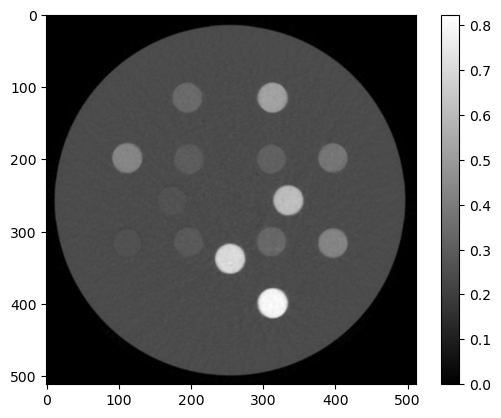

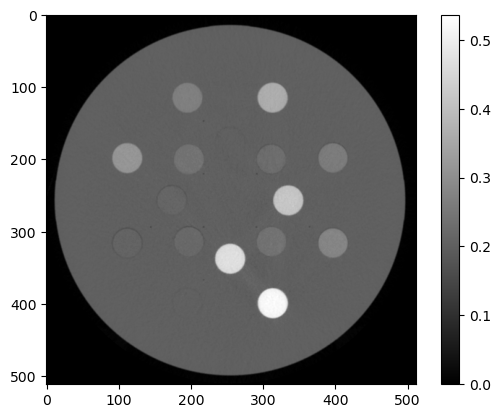

In [39]:
# choose slice location 0
ds_E1 = dss[104]  # 80 kV
ds_E2 = dss[95]   # 140 kV

# old measured u_eff values for 80 and 140 for water and air
u_w_E1 = 0.24212932586669922
u_a_E1 = 0.002364289714023471

u_w_E2 = 0.2016972303390503
u_a_E2 = 0.0014648198848590255

def HU_to_u(HU, u_w, u_air, cut_zero=True):
    M = (HU/1000)*(u_w - u_air) + u_w
    if cut_zero:
        M[M<0] = 0.0
    return M
    
def M_HU(ds):
    M_raw = ds.pixel_array
    m = float(ds.RescaleSlope)
    b = float(ds.RescaleIntercept)
    return m*M_raw + b
    
# mu matrices
M_E1 = HU_to_u(M_HU(ds_E1), u_w_E1, u_a_E1)
M_E2 = HU_to_u(M_HU(ds_E2), u_w_E2, u_a_E2)

for M in [M_E1, M_E2]:
    plt.imshow(M, cmap='gray')
    plt.colorbar()
    plt.show()

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 12.4 µs


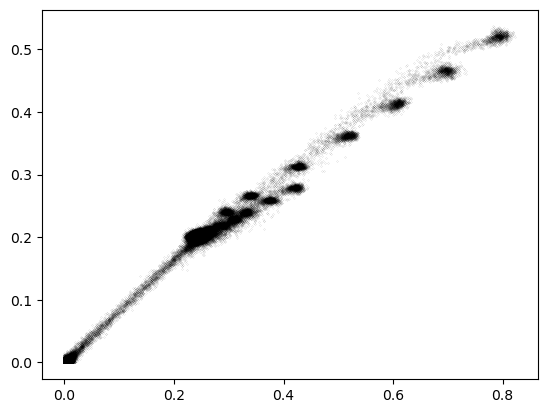

In [45]:
%time

plt.plot(M_E1.ravel(), M_E2.ravel(), 'k.', markersize=.1)
plt.show()

In [46]:
M_E1.astype(np.float32).tofile('test_imgs/M_E1.npy')
M_E2.astype(np.float32).tofile('test_imgs/M_E2.npy')